# Project: Tennis Ace

Project Goals:

To create a liner regression model that predicts the outcome of a tennis player based on their playing habits.By analyzing and modeling the Association of Tennis Professionals (ATP) data, the task is to determine what it takes to be one of the best tennis players in the world.

Source: Codecademy 

importing pandas, and numpy module

In [1]:
import pandas as pd
import numpy as np

loading dataset 'tennis_stats.csv' into a dataframe tennis

In [11]:
tennis = pd.read_csv('tennis_stats.csv')
tennis.head()

,Player,Year,FirstServe,FirstServePointsWon,FirstServeReturnPointsWon,SecondServePointsWon,SecondServeReturnPointsWon,Aces,BreakPointsConverted,BreakPointsFaced,...,ReturnGamesWon,ReturnPointsWon,ServiceGamesPlayed,ServiceGamesWon,TotalPointsWon,TotalServicePointsWon,Wins,Losses,Winnings,Ranking
0,Pedro Sousa,2016,0.88,0.50,0.38,0.50,0.39,0,0.14,7,...,0.11,0.38,8,0.50,0.43,0.50,1,2,39820,119
1,Roman Safiullin,2017,0.84,0.62,0.26,0.33,0.07,7,0.00,7,...,0.00,0.20,9,0.67,0.41,0.57,0,1,17334,381
2,Pedro Sousa,2017,0.83,0.60,0.28,0.53,0.44,2,0.38,10,...,0.16,0.34,17,0.65,0.45,0.59,4,1,109827,119
3,Rogerio Dutra Silva,2010,0.83,0.64,0.34,0.59,0.33,2,0.33,5,...,0.14,0.34,15,0.80,0.49,0.63,0,0,9761,125
4,Daniel Gimeno-Traver,2017,0.81,0.54,0.00,0.33,0.33,1,0.00,2,...,0.00,0.20,2,0.50,0.35,0.50,0,1,32879,272


Since the dataframe is too large we need to know all the attributes(columns/features)

In [8]:
tennis.columns

Index(['Player', 'Year', 'FirstServe', 'FirstServePointsWon',
       'FirstServeReturnPointsWon', 'SecondServePointsWon',
       'SecondServeReturnPointsWon', 'Aces', 'BreakPointsConverted',
       'BreakPointsFaced', 'BreakPointsOpportunities', 'BreakPointsSaved',
       'DoubleFaults', 'ReturnGamesPlayed', 'ReturnGamesWon',
       'ReturnPointsWon', 'ServiceGamesPlayed', 'ServiceGamesWon',
       'TotalPointsWon', 'TotalServicePointsWon', 'Wins', 'Losses', 'Winnings',
       'Ranking'],
      dtype='object')

We import matplotlit module, .scatter() or seaborn method to visualize relatonship between the features and outcomes.

In [13]:
from matplotlib import pyplot as plt
import seaborn as sns

Analysing relation between BreakPointsOpportunities and Winnings outcomes via seaborn's scatterplot

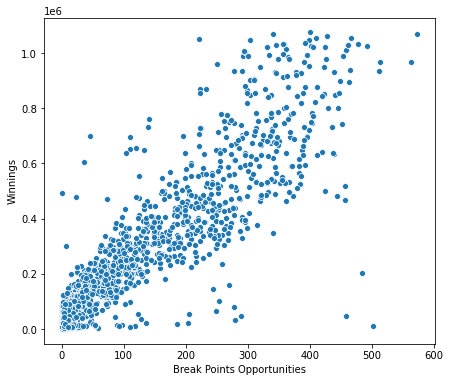

In [23]:
plt.figure(figsize=(7,6))
ax= plt.subplot()
sns.scatterplot(x = 'BreakPointsOpportunities', y = 'Winnings', data = tennis)
plt.xlabel('Break Points Opportunities')
plt.ylabel('Winnings')
plt.show()

Analysing the above scatterplot between BreakPointsOpportunitis and Winnings, we can say that there is quite strong (linear) association between two.

In order to verify the strength of association between two features we use Pearson Correlation,and for this we import personr module from scipy.stats

In [24]:
from scipy.stats import pearsonr

In [25]:
corr_breakpointopp_win, p = pearsonr(tennis.BreakPointsOpportunities,tennis.Winnings)
corr_breakpointopp_win

0.9004439010037775

Generally a correlation larger than .3 indicates a liner association between features. 
A correlation large than about .6 suggests a strong linear association between features.

In our case we got the correlation of 0.90 between BreakPointsOpportunities and Winnigs, 
which means there is strong association between these attributes.

Lets create a linear regression model that uses multiple features to predict Winnings.

We import train_test_split from sklearn.model_selection and LinearRegression from linear_model for this purpose

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [102]:
features = tennis[['FirstServe','FirstServePointsWon','FirstServeReturnPointsWon',
'SecondServePointsWon','SecondServeReturnPointsWon','Aces',
'BreakPointsConverted','BreakPointsFaced','BreakPointsOpportunities',
'BreakPointsSaved','DoubleFaults','ReturnGamesPlayed','ReturnGamesWon',
'ReturnPointsWon','ServiceGamesPlayed','ServiceGamesWon','TotalPointsWon',
'TotalServicePointsWon']]
outcome = tennis[['Winnings']]

features_train, features_test, outcome_train, outcome_test = train_test_split(features,outcome, train_size = 0.8, test_size = 0.2)

# creating LinearRegression model
model = LinearRegression() 

# fit the training data using .fit method. It finds the coefficients and the intercept value
model.fit(features_train, outcome_train)

LinearRegression()

In [103]:
# calculating the accuracy of our train model
model.score(features_train, outcome_train)

0.8461150743758022

In [104]:
# calculating the accuracy of our test model
model.score(features_test, outcome_test)

0.8234554457924229

Let's find out the coefficients. Coefficients are most helpful in determining which independent features carries more weight.

In [45]:
model.coef_

array([[ 5.28066990e+04,  2.56757883e+05,  5.35826653e+03,
         1.74626324e+05,  4.25737694e+04, -4.39883180e+00,
         1.05773646e+03, -9.54194734e+02,  8.48330952e+02,
         5.19677075e+04,  5.86117628e+02,  9.30545054e+01,
         6.82862552e+04, -1.02597578e+05,  8.51622860e+02,
         2.26925744e+03, -1.56643566e+05, -3.38605422e+05]])

In our model we've used 18 variables, so we've got 18 coefficients.

Let's find out if any features especially with negative coefficients have any affect in winning or not. We can use scatterplot to graph features against winning. 

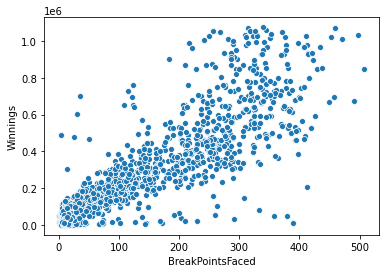

In [47]:
sns.scatterplot(x = 'BreakPointsFaced', y = 'Winnings', data = tennis)
plt.show()

Above graph shows the strong association. Let's find out mathematically

In [49]:
corr_breakpoface_win,p = pearsonr(tennis.BreakPointsFaced, tennis.Winnings)
corr_breakpoface_win

0.8760356989199043

Let's plot another graph

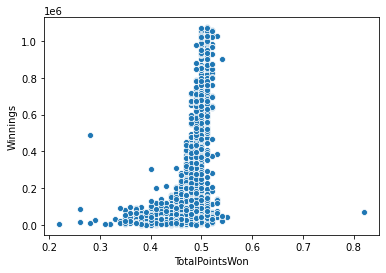

In [50]:
sns.scatterplot(x = 'TotalPointsWon', y = 'Winnings', data = tennis)
plt.show()

In [51]:
# Correlation calculation
corr_totalpowon_win,p = pearsonr(tennis.TotalPointsWon, tennis.Winnings)
corr_totalpowon_win

0.4610608287812499

Correlation calculation of above fig shows the association between two features but not the very strong association.

Let's calculate correlation between some features and winnings

In [85]:
corr1, p1 = pearsonr(tennis.ReturnPointsWon, tennis.Winnings)
corr1

0.2716459071831747

In [86]:
corr2, p2 = pearsonr(tennis.ReturnGamesWon, tennis.Winnings)
corr2

0.2796450565493097

In [88]:
corr3, p3 = pearsonr(tennis.BreakPointsSaved, tennis.Winnings)
corr3

0.25827077188659864

Above calculations of correlation (<.3) of different features against Winnings shows not strong linear association.

Lets rebuild the Linear Regression model by removing some of the features that don't have string correlations to see if we can improv our score. Initially our model train model has scored 0.83 and test model has scored 0.85.

In [108]:
# We've removed BreakPointsSaved feature

features = tennis[['FirstServe','FirstServePointsWon','FirstServeReturnPointsWon',
'SecondServePointsWon','SecondServeReturnPointsWon','Aces',
'BreakPointsConverted','BreakPointsFaced','BreakPointsOpportunities','DoubleFaults','BreakPointsSaved','ReturnGamesPlayed','ServiceGamesPlayed','ServiceGamesWon','TotalPointsWon',
'TotalServicePointsWon']]
outcome = tennis[['Winnings']]

features_train, features_test, outcome_train, outcome_test = train_test_split(features,outcome, train_size = 0.8, test_size = 0.2)

# creating LinearRegression model
model = LinearRegression() 

# fit the training data using .fit method. It finds the coefficients and the intercept value
model.fit(features_train, outcome_train)

LinearRegression()

In [109]:
# calculating the accuracy of our train model
model.score(features_train, outcome_train)

0.8346723488002008

In [110]:
# calculating the accuracy of our test model
model.score(features_test, outcome_test)

0.8675142754733713